<a href="https://colab.research.google.com/github/zberis/DSPS_ZBeris/blob/main/HW2/Copy_of_Instructions_Bayesian_posteriors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I Worked with Katie Moses, Alex Bruce and TJ Tomaszewski

I helped with plotting and data visualization

Katie helped with figuring out how to make the posterior function.

Alex helped with defining the Norm_0 etc functions.

TJ helped with writing the plot captions.


# Do priors matter??

Inspired by https://twitter.com/rlmcelreath/status/1701165078949581182/photo/1

TASK 1: Use `scipy.stats` to generate four distributions:
- a standard normal with mean 0, variance 1
- a standard normal with mean 10, variance 1
- a student's with 2 degrees of freedom centered on 0
- a student's with 2 degrees of freedom centered on 10

Plot all the distributions.


TASK 2: Create a function that takes two arguments: (1) a prior distribution (as a numpy array), (2) a likelihood distribution (same), calculates the posterior distributions, and plots the prior (with a black dashed line), likelihood (black solid line), and posterior (red line). Normalize each distribution before calculating the prior and plotting so that the peak is at the same height (for optimal visibility).

TASK 3: Pass to the function each combination of prior and likelihood between the four distributions you creted: normal-normal, t-t, normal-t, t-normal.

Your should end up with a plot of the posterior linelihood and prior in the same plot for each of the four posterior distributions (4 plots). EACH PLOT SHOULD BE FOLLOWED BY A CAPTION DESCRIBING THE WHAT THE WHY AND THE "WOW"



In [1]:
#these are all the imports you need
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams.update({
    "font.family": "DejaVu Sans",  # Other options: "Arial", "sans-serif"
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})
...

Ellipsis

##Part 1:

In [28]:
np.random.seed(6220)
support = np.arange(-10,20,.001)
Norm_0 = stats.norm.pdf(support, 0, scale = 1)
Norm_10 = stats.norm.pdf(support, 10, scale = 1)
tStudent_0 = stats.t.pdf(support, 2, 0)
tStudent_10 = stats.t.pdf(support, 2, 10)

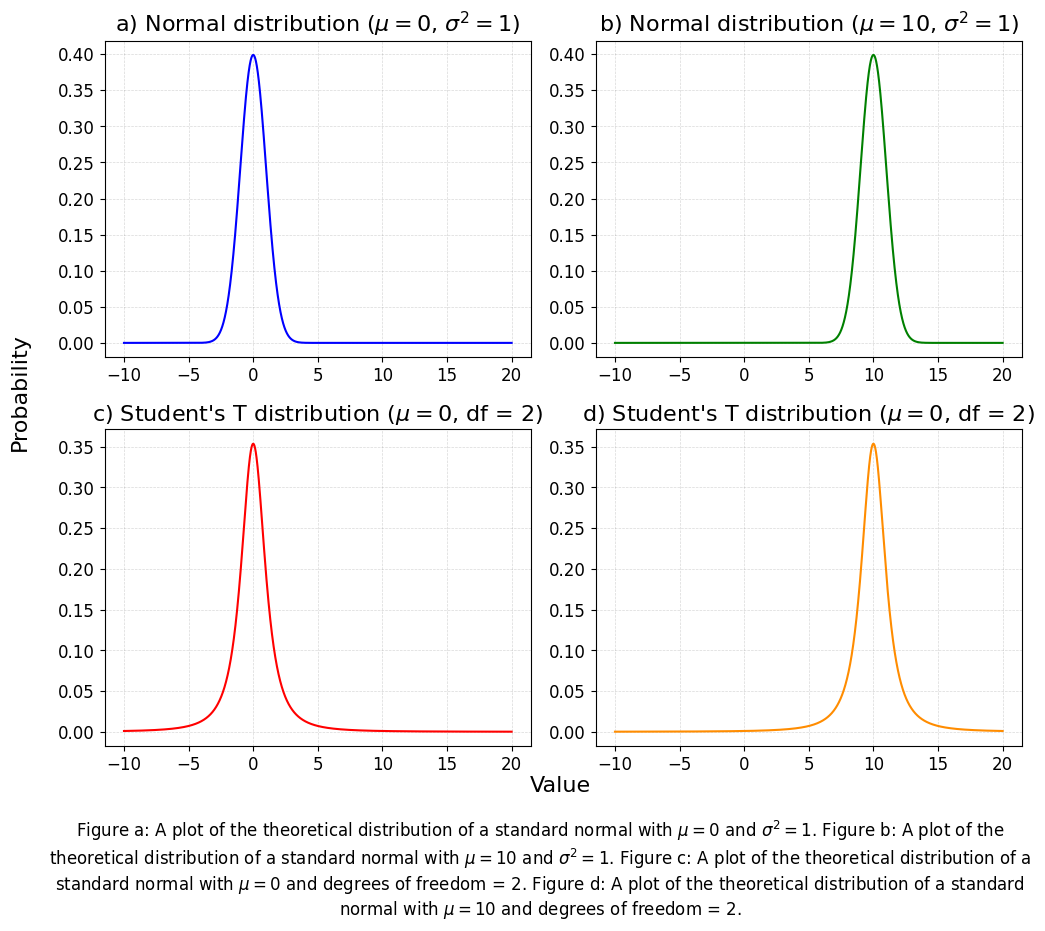

In [50]:
# This code for the plot was initially generated by ChatGPT before being altered/refined by me. Prompt: How to make a figure with 4 graphs in a box. I want them all to have the same axes label.
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(support, Norm_0, color="blue")
axs[0, 0].set_title(r"a) Normal distribution ($\mu = 0$, $\sigma^2 = 1$)")
axs[0,0].grid(True, linestyle="--", linewidth=0.5, color="gray", alpha=0.3)


axs[0, 1].plot(support, Norm_10, color="green")
axs[0, 1].set_title(r"b) Normal distribution ($\mu = 10$, $\sigma^2 = 1$)")
axs[0,1].grid(True, linestyle="--", linewidth=0.5, color="gray", alpha=0.3)


axs[1, 0].plot(support, tStudent_0, color="red")
axs[1, 0].set_title(r"c) Student's T distribution ($\mu = 0$, df = 2)")
axs[1,0].grid(True, linestyle="--", linewidth=0.5, color="gray", alpha=0.3)


axs[1, 1].plot(support, tStudent_10, color="darkorange")
axs[1, 1].set_title(r"d) Student's T distribution ($\mu = 0$, df = 2)")
axs[1,1].grid(True, linestyle="--", linewidth=0.5, color="gray", alpha=0.3)


fig.text(0.52, 0.00, "Value", ha="center", fontsize=16)
fig.text(-0.03, 0.5, "Probability", va="center", rotation="vertical", fontsize=16)

fig.text(0.5, -0.15, r"Figure a: A plot of the theoretical distribution of a standard normal with $\mu = 0$ and $\sigma^2 = 1$. Figure b: A plot of the theoretical distribution of a standard normal with $\mu = 10$ and $\sigma^2 = 1$. Figure c: A plot of the theoretical distribution of a standard normal with $\mu = 0$ and degrees of freedom = 2. Figure d: A plot of the theoretical distribution of a standard normal with $\mu = 10$ and degrees of freedom = 2.", ha="center", wrap = True)

plt.tight_layout()

plt.show()

##Part 2:

In [59]:
def posterior(prior, likelihood):
  normalized_prior = (prior)/(np.sum(prior)) * 10**3
  normalized_likelihood = (likelihood)/ (np.sum(likelihood)) * 10**3
  this_posterior =  prior*likelihood
  normalized_posterior = (this_posterior)/(np.sum(this_posterior)) * 10**3
  plt.plot(np.arange(-10,20,.001),normalized_prior, label = "Prior", color = "black", linestyle = "--")
  plt.plot(np.arange(-10,20,.001),normalized_likelihood, label = "Likelihood", color = "black")
  plt.plot(np.arange(-10,20,.001),normalized_posterior, label = "Posterior", color = "red")
  plt.grid(True, linestyle="--", linewidth=0.5, color="gray", alpha=0.3)
  plt.legend()
  plt.xlabel("value") #all plots need axis labels!!
  plt.ylabel("probability") #all plots need axis labels!!

#Part 3

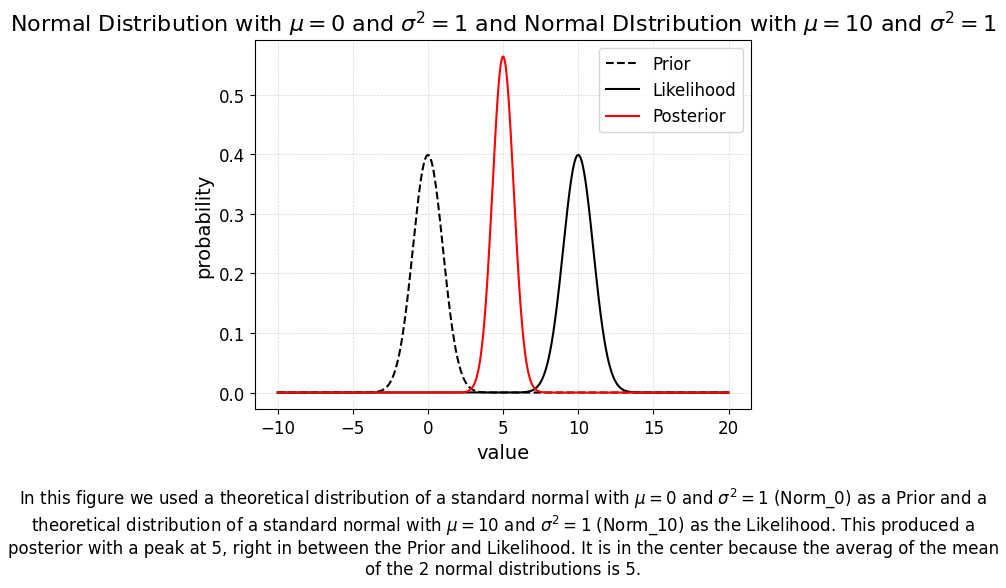

In [81]:
#function call
posterior(Norm_0, Norm_10)
plt.title(r"Normal Distribution with $\mu = 0$ and $\sigma^2 = 1$ and Normal DIstribution with $\mu = 10$ and $\sigma^2 = 1$")
plt.text(5, -0.3, r"In this figure we used a theoretical distribution of a standard normal with $\mu = 0$ and $\sigma^2 = 1$ (Norm_0) as a Prior and a theoretical distribution of a standard normal with $\mu = 10$ and $\sigma^2 = 1$ (Norm_10) as the Likelihood. This produced a posterior with a peak at 5, right in between the Prior and Likelihood. It is in the center because the averag of the mean of the 2 normal distributions is 5.", ha="center", wrap = True);


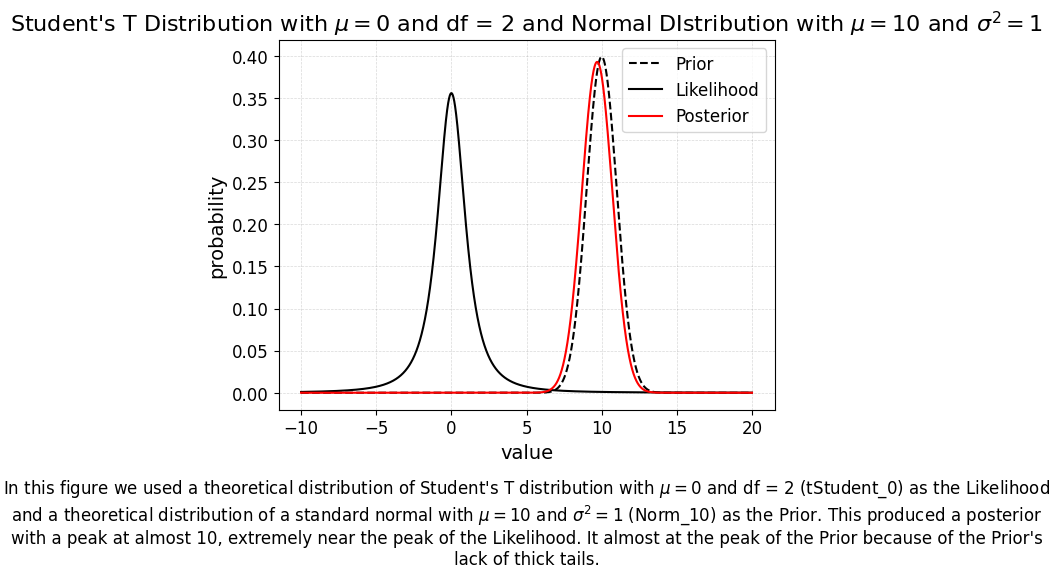

In [85]:
posterior(Norm_10, tStudent_0)
plt.title(r"Student's T Distribution with $\mu = 0$ and df = 2 and Normal DIstribution with $\mu = 10$ and $\sigma^2 = 1$")
plt.text(5, -0.2, r"In this figure we used a theoretical distribution of Student's T distribution with $\mu = 0$ and df = 2 (tStudent_0) as the Likelihood and a theoretical distribution of a standard normal with $\mu = 10$ and $\sigma^2 = 1$ (Norm_10) as the Prior. This produced a posterior with a peak at almost 10, extremely near the peak of the Likelihood. It almost at the peak of the Prior because of the Prior's lack of thick tails.", ha="center", wrap = True);


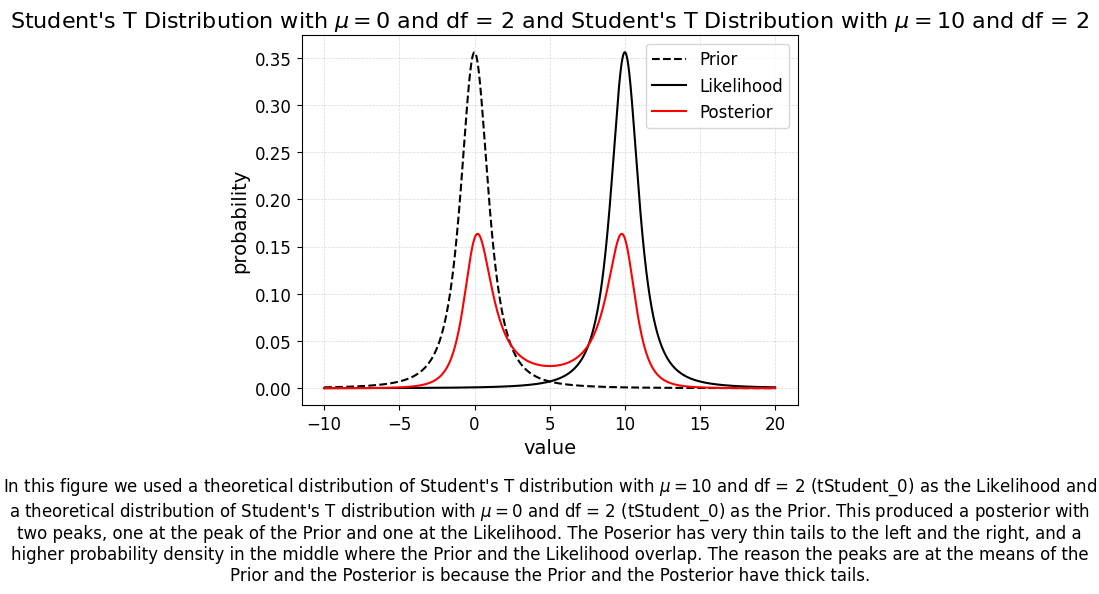

In [87]:
posterior(tStudent_0, tStudent_10)
plt.title(r"Student's T Distribution with $\mu = 0$ and df = 2 and Student's T Distribution with $\mu = 10$ and df = 2")
plt.text(5, -0.2, r"In this figure we used a theoretical distribution of Student's T distribution with $\mu = 10$ and df = 2 (tStudent_0) as the Likelihood and a theoretical distribution of Student's T distribution with $\mu = 0$ and df = 2 (tStudent_0) as the Prior. This produced a posterior with two peaks, one at the peak of the Prior and one at the Likelihood. The Poserior has very thin tails to the left and the right, and a higher probability density in the middle where the Prior and the Likelihood overlap. The reason the peaks are at the means of the Prior and the Posterior is because the Prior and the Posterior have thick tails.", ha="center", wrap = True);


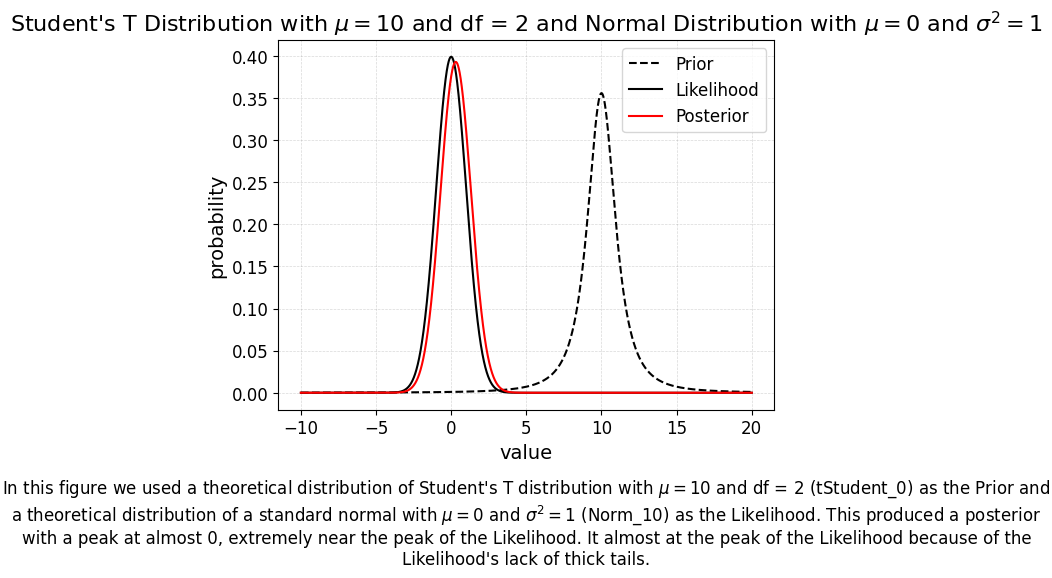

In [86]:
posterior(tStudent_10, Norm_0)
plt.title(r"Student's T Distribution with $\mu = 10$ and df = 2 and Normal Distribution with $\mu = 0$ and $\sigma^2 = 1$")
plt.text(5, -0.2, r"In this figure we used a theoretical distribution of Student's T distribution with $\mu = 10$ and df = 2 (tStudent_0) as the Prior and a theoretical distribution of a standard normal with $\mu = 0$ and $\sigma^2 = 1$ (Norm_10) as the Likelihood. This produced a posterior with a peak at almost 0, extremely near the peak of the Likelihood. It almost at the peak of the Likelihood because of the Likelihood's lack of thick tails.", ha="center", wrap = True);
